# 创建一个线性数据集

In [1]:
import numpy as np
x = 2 * np.random.rand(100, 1)  # 返回100*1的数组，x在0到1服从均匀分布
y = 4 + 3 * x + np.random.rand(100, 1)

设置图像显示

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

(0.0, 2.1, 4.0, 11.0)

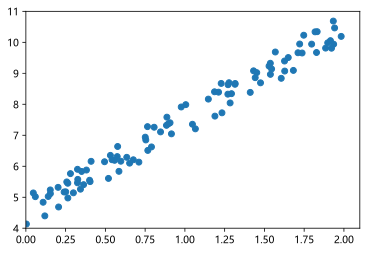

In [3]:
plt.scatter(x, y)
plt.axis([0,2.1,4,11])  # 界定轴范围，[x0,x1,y0,y1]

实际函数：$y = 4 + 3x + \epsilon$

$\epsilon$ 服从正态分布，也称高斯噪声

## 成本函数和公式法

线性公式：$\hat{y}=\theta x$，这里用的是“点乘”，点乘要求矩阵同形，对应位置对应相乘

注意：在机器学习中，默认采用“点乘法”而非“矩阵乘法”

$\theta=[\theta_0,\theta_1, ... ,\theta_m]$，其中$\theta_0$是截距项，其余为系数（权重）项

$x=[x_0, x_1, ..., x_m]$，其中$X_0$始终为1，在定义时直接定义为1，因为$X_0$对应的是$\theta_0$，截距项不能乘以其他系数

成本函数，即算均方差，这里的$\theta$和X，y都是向量形式

$MSE(X,h_0)=MSE(\theta)=\frac{1}{m}\sum_{k=1}^m(\theta^Tx^{(i)}-y^{(i)})^2$

标准方程直接求参数，即公式法

$\hat{\theta}=(X^TX)^{-1}X^Ty$

In [4]:
x_b = np.c_[np.ones((100,1)), x]  # 每一个向量的 x0 都赋值为1，返回一个100*2的x矩阵

In [5]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)  # np.linalg.inv()求逆矩阵，这里是公式法

In [6]:
theta_best

array([[4.54642368],
       [2.97157545]])

实际函数：$y = 4 + 3x + \epsilon$

可见非常接近

## 利用求得的参数预测

In [7]:
x_new = np.array([[0],[2]])  # 预测矩阵x，2*1
x_new_b = np.c_[np.ones((2,1)), x_new]  # 添加1到预测矩阵
y_predict = x_new_b.dot(theta_best)  # x点乘之前得出的估计θ（theta_best）
y_predict  # 这是预测的两个端点的值，相连就是预测线段

array([[ 4.54642368],
       [10.48957457]])

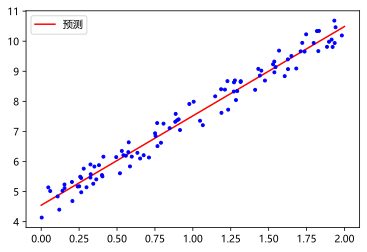

In [8]:
plt.plot(x_new, y_predict, 'r-', label='预测')
plt.plot(x, y, 'b.')
plt.legend()
plt.show()

### sklearn 方法

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_  # 截距项.intercept_，系数项.coef_

(array([4.54642368]), array([[2.97157545]]))

In [11]:
lin_reg.predict(x_new)  # 预测值

array([[ 4.54642368],
       [10.48957457]])

### scipy（numpy）方法

LinearRegression 基于scipy.linalg.lstsq()函数（最小二乘法）

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)  # rcond 为误差截止值
# theta_best_svd = np.linalg.lstsq(x_b, y, rcond=1e-6)[0]

residuals 是残差，rank 是秩，一般只需要 theta_best_svd 即可

In [13]:
theta_best_svd  # θ的预测向量

array([[4.54642368],
       [2.97157545]])

np.linalg.lstsq 计算 $\hat{\theta}=X^{+}y$，$X^{+}$是X的伪逆矩阵，利用np.linalg.pinv()函数可以直接求伪逆

一个与A的转置矩阵$A^T$同型的矩阵X，满足：$AXA=A，XAX=X$；此时，称矩阵X为矩阵A的伪逆，也称为广义逆矩阵。

伪逆矩阵本身是用奇异值分解（SVD）的标准矩阵分解技术计算的，伪逆矩阵的求法不在这里讨论（毕竟我也不会），奇异矩阵（非方阵）的伪逆矩阵总是有定义的

公式法的本质就是SVD，对于超大数据集，不宜采用公式法

### 复杂度

标准方程计算$X^TX$的逆矩阵，$X^TX$是(n+1)×(n+1)型矩阵，其复杂度通常为$O(n^{2.4})$到$O(n^{3})$

故，如果特征数量翻倍（要估计的参数×2），计算时间乘以大约 $2^{2.4}=5.3$ 到 $2^3=8$ 倍

sklearn 的 linearRegression 类使用的SVD方法的复杂度约为$O(n^{2})$

对于非超大型实例可以直接用SVD公式法，对于超大型实例，采用后面的方法

# 梯度下降（Gradient Descent）

## 批量梯度下降

梯度下降实际上是通过逐一求成本函数$MSE(\theta_j)$的偏导数来确定下降方向

批量梯度下降也称全梯度下降，是通过向量的形式一次性计算全部偏导数，得到一个向量

* 成本函数：$MSE(X,h_0)=MSE(\theta)=\frac{1}{m}\sum_{k=1}^m(\theta^Tx^{(i)}-y^{(i)})^2$


* 成本函数的偏导数：
$\frac{\partial MSE(\theta)}{\partial\theta_j}=\frac{2}{m}\sum_{k=1}^m(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}$，即$\theta^T$幂导再乘以系数$x_j^{(i)}$

梯度向量

$\nabla_{\theta}MSE(\theta)=[\frac{\partial}{\partial\theta_0}MSE(\theta), \quad\frac{\partial}{\partial\theta_1}MSE(\theta),  \quad...,  \quad\frac{\partial}{\partial\theta_n}MSE(\theta)]^T=\frac{2}{m}X^T(X\theta-y)$

也就是上面的公式的向量表示形式

算出梯度之后，如果梯度为正，即上坡，θ就减去$\nabla_{\theta}MSE(\theta)×\eta$:

$\theta^{(下一步)} \quad =\theta-\eta\nabla_{\theta}MSE(\theta)$

In [14]:
eta = 0.1  # 学习率等于0.1
n_iteration = 1000  # 迭代次数
m = 100  # 公式里面的分母m，即参数个数
theta = np.random.randn(2,1)  # randn是标准正态分布，rand是[0,1)均匀分布，随机生成theta，自动下降到最优状态
for _ in range(n_iteration):
    gradients = 2/m * (x_b).T.dot(x_b.dot(theta) - y)  # 一次性全部计算出来
    theta = theta - eta * gradients

In [15]:
theta

array([[4.54642368],
       [2.97157545]])

一般来说，要设置一个容差（范数）$\epsilon$，即当梯度下降的值小于$\epsilon$时结束迭代，节约时间

## 随机梯度下降

利用模拟退火方法，逐步降低学习率，开始步长比较大，越往后越缩小，靠近全局最小值

In [16]:
n_epochs = 50  # 迭代轮数
t0, t1 = 5, 10  # 学习进度超参数，用于调整学习率

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # 随机确定θ初始值
for epoch in range(n_epochs):
    for i in range(m):  # m是实例个数，即在样本中抽100次值，每次单独计算一个，不需要批量计算
        random_index = np.random.randint(m)  # 0到m随机取值
        xi = x_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [17]:
theta

array([[4.52569532],
       [2.98319775]])

由于是随机抽的，有些样本可能从未被取到，如果要确保遍历全部实例，就要对训练集混洗（同步混洗特征和标签），然后逐个遍历，然后再次混洗，类推，收敛较慢。

### SGDRegressor实现

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)  
# 设定最大迭代1000， 范数（tolerance）0.0003，学习率0.1，penalty表示正则化类型
sgd_reg.fit(x, y.ravel())  # .ravel()是把多维数组转为一维数组，即全部合并到一个向量中，不加此方法会告警

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_  # 输出参数

(array([4.5179913]), array([2.97921202]))

也比较接近

## 小批量梯度下降

每次抽取一小批实例进行批量梯度下降，比一次性梯度下降性能好一点

# 多项式回归

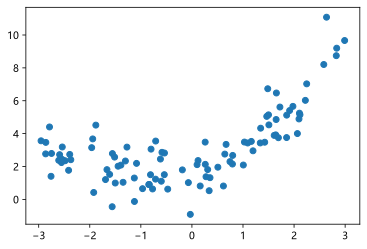

In [20]:
m = 100
x = 6 * np.random.rand(m, 1) - 3  # np.random.rand(m, 1) 是0到1均匀分布的矩阵，x分布在 -3 ~ 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)  # 生成一批数据集
plt.scatter(x, y)

## 多项式特征

$y = 0.5x^2 + x + 2$

In [21]:
from sklearn.preprocessing import PolynomialFeatures  # 多项式（Polynomia）特征
poly_features = PolynomialFeatures(degree=2, include_bias=False)  # include_bias=False就不输出截距项系数1
# degree设定需要拟合的最高次幂，该方法会自动添加所有特征（比较智能），但degree设定太高可能会数量爆炸
x_poly = poly_features.fit_transform(x)
x_poly[0]  # x_poly是转换后的x，现在包含原始特征和特征的平方，目的是增加一个新的特征，把x^2降为一阶的值

array([0.12012028, 0.01442888])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_  # 系数项的顺序是升幂顺序

(array([1.70938366]), array([[0.9289607 , 0.53958493]]))

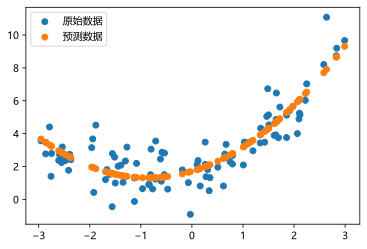

In [23]:
plt.scatter(x, y, label='原始数据')
plt.scatter(x, lin_reg.predict(x_poly), label='预测数据')
plt.legend()
plt.show()

In [24]:
lin_reg.score(x_poly, y)

0.7720356999751287

定义一个函数展示学习曲线

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_ver, y_train, y_ver = train_test_split(x, y, test_size=0.2)  # 划分训练集和验证集（verification）
    train_errors, ver_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])  # 训练实例随循环次数上升
        y_train_predict = model.predict(x_train[:m])
        y_ver_predict = model.predict(x_ver)  # 训练集无需切片，模型随训练集的扩大而改变，验证集的预测结果也改变了
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))  # 记录在训练集上的标准差
        ver_errors.append(mean_squared_error(y_ver, y_ver_predict))  # 记录验证集的标准差
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='训练')
    plt.plot(np.sqrt(ver_errors), 'b-', linewidth=3, label='验证')
    plt.ylabel('RMSE')
    plt.legend()

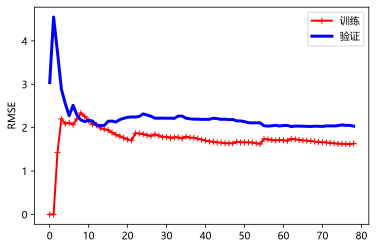

In [26]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

首先，误差都趋于1.5，如果最后趋于平稳的区域比较高，即RMSE没有逐渐到低位平缓，则存在欠拟合问题，其次，有时候验证集的误差反而低于训练集，其原因可能是数据太少，导致训练集和验证集的分布出现差别。

出现欠拟合问题，增加更多数据无济于事（两误差之间已经很接近），应该采用更复杂的模型或提供更好的特征。

> 从置信区间角度理解标准差，标准差越小，说明预测值越精确

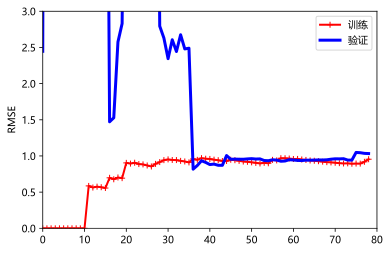

In [27]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('ploy_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plt.axis([0,80,0,3])  # 限定轴，否则该结果验证集误差过高，图像下方看不出差异
plot_learning_curves(polynomial_regression, x, y)

误差趋近1，比一次方程的误差1.5要好，其次训练集的效果比验证集要好，且间隔较大，说明存在过拟合，改善过拟合需要提高更多训练数据

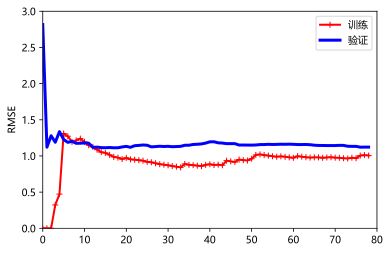

In [28]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('ploy_feature', PolynomialFeatures(degree=2, include_bias=False)),  # 改成二项式
    ('lin_reg', LinearRegression()),
])

plt.axis([0,80,0,3])  # 限定轴，否则该结果验证集误差过高，图像下方看不出差异
plot_learning_curves(polynomial_regression, x, y)

显然二项式效果最好

# 正则化线性模型

## 岭回归 

岭回归之前最好先缩放数据，StandardScaler

岭回归就是在成本函数中加上$\alpha\frac{1}{2}\sum^{n}_{i=1}\theta_i^2$，可以称之为惩罚函数，系数越大会导致成本增加

* 成本函数 $J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum^{n}_{i=1}\theta_i^2$

注意，$\theta$的角标从1开始，不包括截距项系数，$\alpha$控制正则化程度，$\alpha$增加则拟合曲线变平坦

* 闭式解（公式法）：$\hat{\theta}=(X^TX+\alpha A)^{-1}X^Ty$

A是(n+1)×(n+1)对角方阵，左上角是0（除开截距项），对角线其余均为1

In [29]:
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
x_new = np.linspace(0, 3, 100).reshape(100, 1)

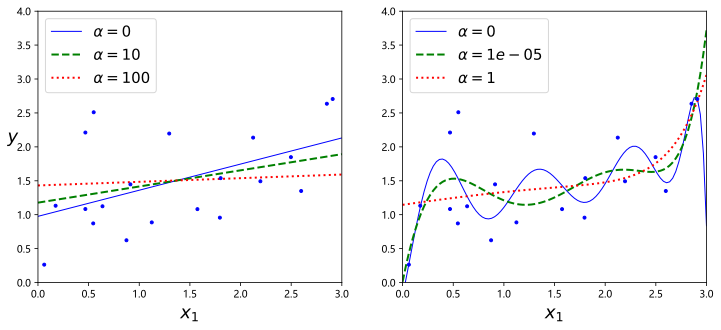

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(x, y)
        y_new_regul = model.predict(x_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(x_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(x, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

以上代码用于演示图像

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [32]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
# 梯度下降法，正则项类型为l2，即权重向量的l2范数平方的一半，也就是岭回归
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso回归

* 成本函数 $J(\theta)=MSE(\theta)+\alpha\sum^{n}_{i=1}\theta_i^2$

与岭回归区别在于$\sum^{n}_{i=1}\theta_i^2$的系数是1，不是1/2

In [33]:
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
# 梯度下降法，正则项类型为l1
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5], [2]])

array([1.47011206, 1.78031855])

## 弹性网络

$J(\theta)=MSE(\theta) + r\alpha\sum^{n}_{i=1}|\theta_i|+\frac{1-r}{2}\alpha\sum^{n}_{i=1}\theta_i^2$

r为混合比，该方法介于岭回归和Lasso回归之间

In [34]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio 对应r
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([1.54333232])

有正则化比无正则化更好，默认岭回归，如果认为有效特征只有少数几个，应该倾向于使用Lasso或弹性网络，而更倾向于弹性网络

## 提前停止

验证集误差达到最小时停止训练。

In [35]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x**2 + np.random.randn(m, 1)

x_train, x_ver, y_train, y_ver = train_test_split(x[:50], y[:50].ravel(), test_size=0.5, random_state=10)

基本实现方法如下：

In [36]:
from sklearn.base import clone
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_ver_poly_scaled = poly_scaler.transform(x_ver)  # 不是fit_transform
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005)
                        # warm_start=True 时，下次在停止的地方继续训练
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_ver_prdict = sgd_reg.predict(x_ver_poly_scaled)
    val_error = mean_squared_error(y_ver, y_ver_prdict)
    if val_error < minimum_val_error:  # 一旦误差升高就停止
        minimun_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [37]:
best_epoch

999

# 逻辑回归

逻辑回归计算输入特征的加权和（包括截距项），但输出结果的数理逻辑值而非输出结果

逻辑回归模型的估计概率（向量形式）：

$\hat{p}=h_\theta(x)=\sigma(x^T\theta)$

其中 $\sigma(t) = \frac{1}{1+e^{-1}}$，为sigmoid函数

逻辑回归返回将线性回归结果映射到sigmoid函数上的值（概率）

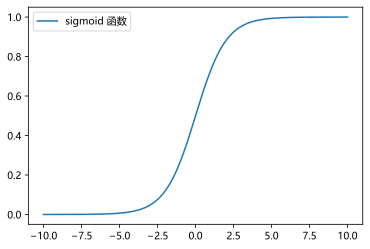

In [38]:
x = np.linspace(-10,10,1000)
y = 1/(1+np.e**(-x))
plt.plot(x,y,label='sigmoid 函数')
plt.legend()
plt.show()

$
\hat{y}=\begin{cases}0，\hat{p}<0.5 \\ 1，\hat{p}\geq0.5 \end{cases}
$

$当x<0时，\sigma(x)<0.5，当x\geq0 时，\sigma(x) \geq 0.5，故如果x^T\theta是正类，逻辑回归预测结果是1，负类为0$

## 训练和成本函数

单个训练实例的成本函数

$
c(\theta)=\begin{cases}  -ln(\hat{p})，y = 1 \\ -ln(1-\hat{p})，y = 0 \end{cases}
$

y是实例，若对于正例，模型估计其概率接近0时，成本c会很高，同理若估计一个负例的概率接近1，成本c也会很高；概率接近1时，对于正例来说成本接近0，对于负例来说，成本会很高。

> 所以预测正例概率越大，成本越低；预测负例概率越小，成本越低。

* 逻辑回归的成本函数

$
J(\theta)=-\frac{1}{m}[y^{(i)}ln(\hat{p}^{(i)})+(1-y^{(i)})ln(1-\hat{p}^{(i)})]
$

* 逻辑成本函数偏导数（梯度下降法）

$
\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum^{m}_{i=1}[\sigma(\theta^Tx^{(i)})-y^{(i)}]x^{(i)}_j
$

## 决策边界

In [39]:
# 鸢尾花数据集
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [40]:
x = iris['data'][:, 3:]  # 这里仅研究花瓣宽度
y = (iris['target'] == 2).astype(np.int32)  # 鸢尾花（正例）标记为1，否则0

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

In [42]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [43]:
y_proba = log_reg.predict_proba(x_new)  # 返回的是概率

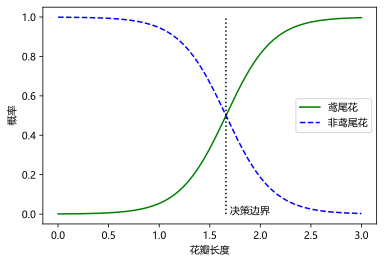

In [44]:
plt.plot(x_new, y_proba[:, 1], 'g-', label='鸢尾花')
plt.plot(x_new, y_proba[:, 0], 'b--', label='非鸢尾花')
plt.xlabel('花瓣长度')
plt.ylabel('概率')
plt.legend()
plt.plot([1.66, 1.66], [0, 1],'k:')  # [x1,x2], [y1, y2]
plt.text(1.7, 0, '决策边界')
plt.show()

In [45]:
log_reg.predict([[1.7], [1.5]])  # 对于花瓣长度1.7和1.5的预测

array([1, 0])

## Softmax回归

* Softmax回归分类器一次只能预测一个类（可以区分多类，但是一次只能输出某个类）

1. 多元逻辑回归  

    类k的Softmax分数：$ s_k(x) = x^T\theta^{(k)} $，形式上与线性回归预测方程一样，返回多个类的分数
    
    每一个$\theta^{(k)}$向量作为行储存在参数矩阵$\Theta$中
    
    $Softmax$函数：$ \hat{p}_k = \sigma(s(x)_k) = \frac{e^{s_{k}(x)}}{\sum^{K}_{j}  e^{s_j(x)}} $，除以所有指数的和进行归一化

2. 实际上：

    $Sigmoid:\hat{p}(x) = \frac{1}{1+e^{-x}}$

    $Softmax:\hat{p}(x_1) = \frac{e^{x_1}}{e^{x_1}+e^{x_2}+...+e^{x_n}} = \frac{1}{1+e^{-(x_1+x_2+...+x_n)}} $

3. Softmax回归分类预测：

    $\hat{y} = arg_k max[\sigma(s(x))_k] = arg_k maxs_k(x) = arg_k max[(\theta^{(k)})^Tx]$

    $argmax$返回使函数最大化的变量值，在此式中，返回使得估计概率$\sigma(s(x))_k$最大的$k$值
    
    
4. 交叉熵成本函数
    
    $J(\Theta)=-\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y^{(i)}log(\hat{p}_k^{(i)})$
    
    $y_k^{(i)}$是属于类k的第i个实例的目标概率，一般而言等于0或1
    
    
5. 交叉熵梯度向量
    
    $\nabla_{\theta(k)}J(\Theta)=\frac{1}{m}\sum^m_{i=1}(\hat{p}^{(i)}_k-y_k^{(1)})x^{(i)}$
* 可以通过计算每个类的梯度向量，然后使用梯度下降，找到最小化成本函数的参数矩阵$\Theta$

In [46]:
x = iris['data'][:, (2, 3)]  # 花瓣长度，花瓣宽度
y = iris['target']  # 包含三类花，用0，1，2表示

In [47]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [49]:
softmax_reg.predict([[5, 2]])

array([2])

In [50]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])